<div id="container" style="position:relative;">
<div style="float:left"><h1>  Capstone Projects NLP - William Nankap </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# NLP ClassifyChat

An innovative text classification project based on natural language processing. It leverages conversations from the freeCodeCamp chat to provide an accurate and efficient solution for automatically categorizing messages and extracting relevant information from large volumes of textual data.

### **`Notebook 4: TFDIF + Kmeans + LDA + SVM¶`**

### **`Author: William Nankap`**

Work plan: https://docs.google.com/presentation/d/10xtITocBaQgZYtDw1yWe_FzQPgR7Je6EkNRv8IJVCPM/edit?usp=sharing


-----

# Table of Contents

- ### Introduction
- ### 1. TFDIF
- ### 2. Data Modeling Kmeans
    - ### First launch
    - ### Hyperparameter optimization
- ### 3. Data Modeling LDA
    - ### First launch
    - ### Hyperparameter optimization
- ### 4. Data Modeling SVM
    - ### First launch
    - ### Hyperparameter optimization
- ### 3. Comparaison
- ### Conclusion

-----

# Introduction

In this notebook, we will explore a powerful combination of techniques for text analysis and machine learning.

TF-IDF (Term Frequency-Inverse Document Frequency) will be our starting point. TF-IDF allows us to transform text documents into numerical feature vectors, taking into account the importance of terms within each document and across the entire collection. By leveraging TF-IDF, we can capture the significance of terms and their relevance to the overall content.

Next, we will delve into K-means clustering, a popular unsupervised learning algorithm. K-means is capable of partitioning our documents into distinct clusters based on their feature vectors derived from TF-IDF. This allows us to group similar documents together and discover underlying patterns or topics in our corpus.

LDA (Latent Dirichlet Allocation) will further enhance our understanding of the topics present in our text data. LDA is a probabilistic topic modeling technique that uncovers latent topics by modeling the generative process of documents. By applying LDA to our TF-IDF representations, we can extract meaningful topics and their respective word distributions.

Lastly, we will explore SVM (Support Vector Machines), a powerful supervised learning algorithm for classification tasks. By training SVM on our TF-IDF features and corresponding labels, we can build a predictive model that can classify new, unseen documents into predefined categories or classes.

Throughout this notebook, we will examine the interplay between these techniques, leveraging the insights gained from TF-IDF, K-means, LDA, and SVM to gain a deeper understanding of our text data and build effective machine learning models.

In [1]:
# We import all the librairies need for exploration, visualization and modeling

import pandas as pd
import numpy as np

#Preprocessing & Tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec as w2v

import string
import re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy import stats
from statsmodels.stats import multicomp
from scipy.stats import pearsonr
import statsmodels.api as sm

from wordcloud import WordCloud
import time


/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


-----
# 1. TFDIF

In this section, we will explore the implementation of TF-IDF, discuss its key parameters, and demonstrate how it can be used to transform our text data into a format suitable for various downstream tasks such as clustering, topic modeling, and classification. TF-IDF is a fundamental tool in the text analysis toolkit, and understanding its concepts and application will greatly enhance our ability to gain insights and extract meaningful information from text data.

In [2]:
#Load data
preprocess_clean_freecodecamp_casual = pd.read_csv('preprocess_clean_freecodecamp_casual.csv')

In [3]:
#Checking null value
cs = preprocess_clean_freecodecamp_casual['clean_text'].isna().sum()

print(f'Our dataset contain {cs} null value in our clean_text column.')

Our dataset contain 420407 null value in our clean_text column.


In [4]:
#Cleaning null value
preprocess_clean_freecodecamp_casual = preprocess_clean_freecodecamp_casual.dropna()

These null values are probably due to the fact that there were empty rows in our dataset after the pre-processing process. All we have to do is delete them and move on.

## Vectorization 

As we have over 5 million data records, which is too much for our machine's capacity, we'll use a reduced set of our dataset for our work. Our sample will be around `4% of our dataset`.

### Sample

In [6]:
#Our sample
X_train = preprocess_clean_freecodecamp_casual['clean_text'].sample(frac=0.04, random_state=42)
print(f'Our sample contain {X_train.shape[0]} rows.')

Our sample contain 183413 rows.


# How our words are distributed in this sample?

/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/anaconda3/lib/python3.9/site-

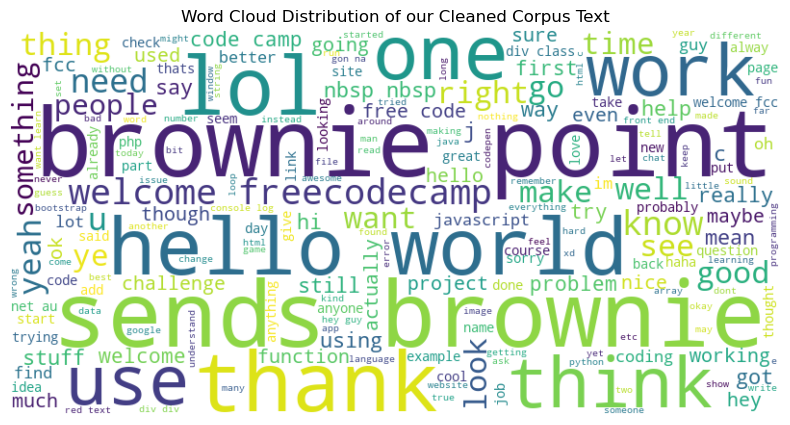

In [7]:
# Combine all the text data into a single string
combined_text = ' '.join(X_train)

# Create the Word Cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud Distribution of our Cleaned Corpus Text')
plt.axis('off')
plt.show()

This visual allows us to see the most frequent words in our dataset before vectorization.

We have a word that occurs 2 times, like `brownie`, and some important words like `point, freecodecamp, code, hello, world...`

When we look online, some comibination have a signification like:
- `brownie point:` This refer some gift exchange by user
- `hello world:` This refer to a common message you can see when you built you first code

We will go throw the vectorization to have more detail and try to see some pattern.

### TFDIF

In [9]:
# Initialize TF-IDF
vectoriseur = TfidfVectorizer()

# Vectorization
small_transformed = vectoriseur.fit_transform(X_train)

In [10]:
#Quick overview on the matrix
small_transformed.toarray().sum(axis=0)

array([6.05693127, 3.7966583 , 0.91295329, ..., 1.        , 1.        ,
       0.695809  ])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


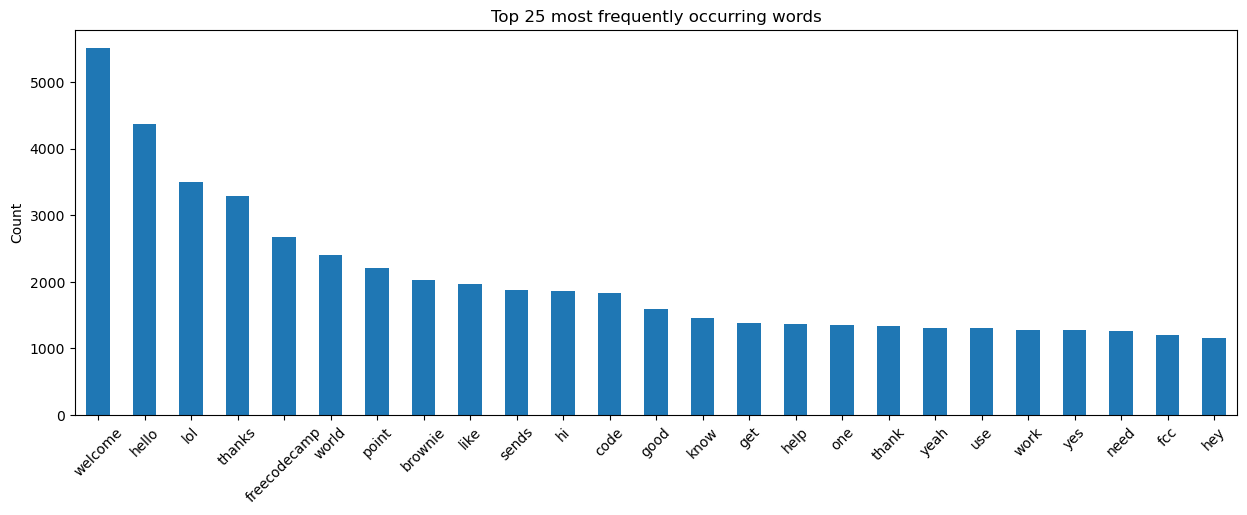

In [12]:
#Overview on the top 25 most frequent word in our corpus text
word_counts = pd.DataFrame(
    {"counts": small_transformed.toarray().sum(axis=0)},
    index=vectoriseur.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(25).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 25 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
print(f'Our corpus text contain {word_counts.shape[0]} different words.')

Our corpus text contain 43364 different words.


Looking at the 25 most frequent words in your countvectorizer, here are a few observations:

In our case, we note that the words "welcome", "hello", "lol", "thanks", and "freecodecamp" have high TF-IDF scores, suggesting that they are frequent in some specific documents and rare in others. These terms could therefore play an important role in differentiating and characterizing the documents in our corpus.

In addition, we can see that words such as "world", "point", "brownie", "like", and "sends" also have relatively high TF-IDF scores, although they may be less frequent than the first words in the list. These terms can provide additional information and nuances specific to certain documents.



## Hyperoptimization of the tfdif

We will try different parameter on our tfdif and see the new distribution, then we will try modeling.

In [27]:
def optimize_tfdif(X_train, stop_words=None, max_features=None, min_df=1, max_df=1000):
    """
    Optimize TFDIF with different parameters and display the different distributions.

    Parameters:
    - X_train: Training data for CountVectorizer.
    - stop_words: List of stop words to be used. Default is None.
    - max_features: Maximum number of features to be considered. Default is None.
    - min_df: Minimal frequency
    - max_df: Maximal frequency

    Returns:
    - word_counts2: DataFrame containing word counts.

    """
    # Initialize TF-IDF
    vectorizer2 = TfidfVectorizer(max_features=max_features, max_df=max_df, min_df=min_df, stop_words=stop_words)

    # Vectorization
    transformed2 = vectorizer2.fit_transform(X_train)

    # Create a DataFrame of word counts
    word_counts2 = pd.DataFrame(
        {"counts": transformed2.toarray().sum(axis=0)},
        index=vectorizer2.get_feature_names()
    ).sort_values("counts", ascending=False)

    # Plot the top 25 most frequent words
    word_counts2.head(25).plot(kind="bar", figsize=(15, 5), legend=False)
    plt.title("Top 25 most frequently occurring words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Return the word_counts DataFrame
    return word_counts2

In [ ]:
# List of parameters to iterate over
stop_words_list = [None, "english"]
max_features_list = [None, 1000, 10000, 20000]
min_df = [5, 10, 20, 50]
max_df = [5, 10, 20, 100]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


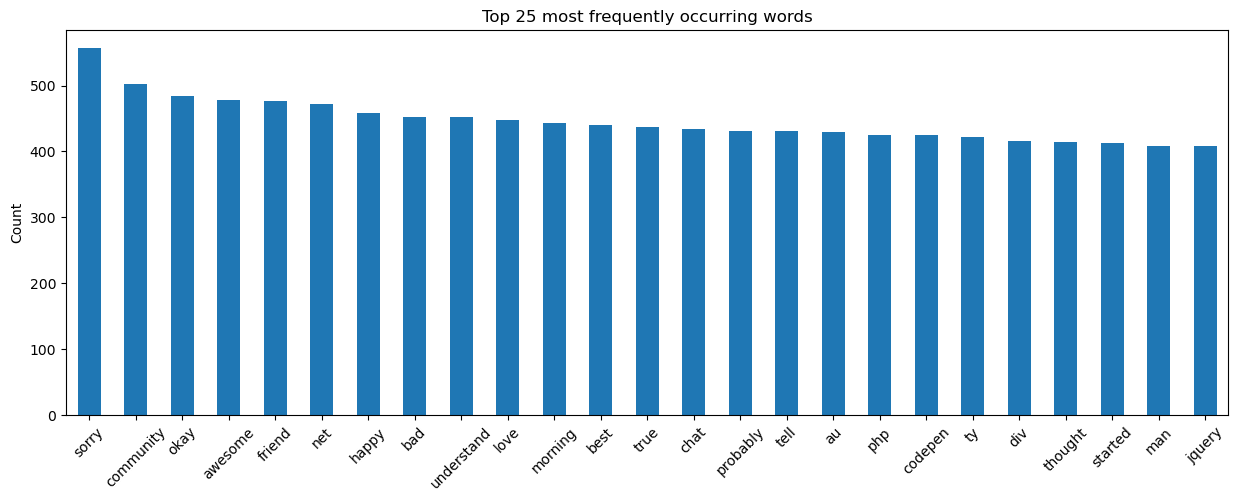

In [25]:
#First test
word_counts2 = optimize_tfdif(X_train, stop_words='english', max_features=10000, min_df=5, max_df=1000)

- Certain words such as "sorry", "community", "okay", "awesome", "friend" have a high frequency, suggesting that they are often present in documents.

- Words such as "net", "php", "codepen", "jquery" seem specific to technical or programming topics, which may indicate a prevalence of discussions or content related to these areas.

- The terms "happy", "love", "best", "true" seem to reflect a positive tone and positive emotions in the corpus.

- Terms such as "bad", "understand", "tell" may be linked to discussions or requests for help concerning problems or difficulties encountered.

- Words such as "morning", "started", "thought" suggest discussions or reflections on specific topics or the beginnings of projects.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


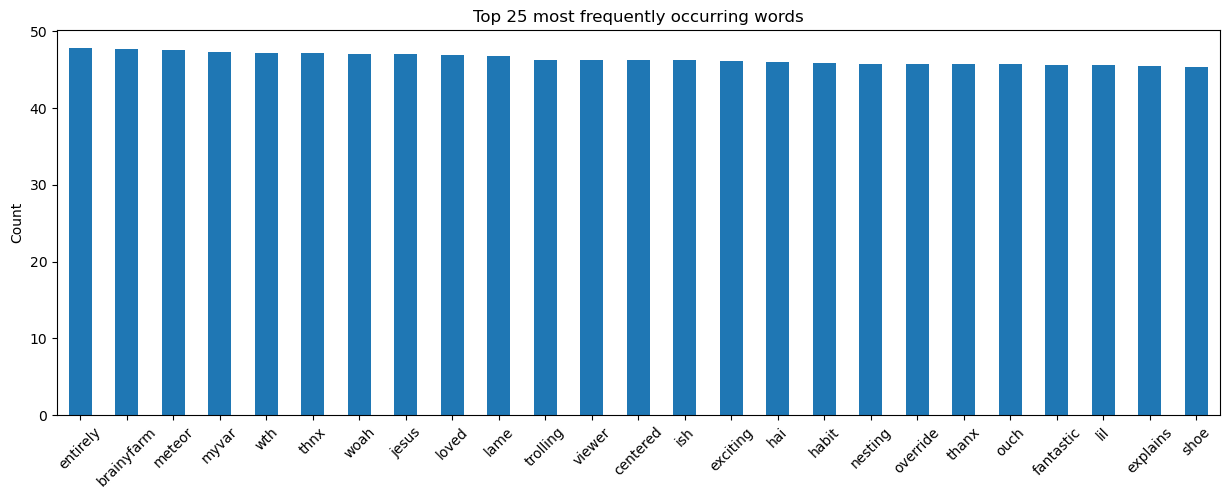

In [28]:
#Second test
word_counts2 = optimize_tfdif(X_train, stop_words='english', max_features=1000, min_df=20, max_df=50)

- Terms such as "entirely", "woah", "lame", "exciting", "fantastic" seem to express intense emotions or strong reactions.

- Words like "brainyfarm", "meteor", "myvar", "centered", "override" may be specific to technical subjects or specialized terminology.

- Terms like "thnx", "thanx", "wth" are informal variants of "thanks" used in online discussions or casual conversations.

- Words like "jesus", "ouch", "explains" can be linked to discussions or comments about personal experiences or particular situations.

- Terms such as "viewer", "nesting", "shoe" may indicate specific topics or particular contexts discussed in the corpus.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


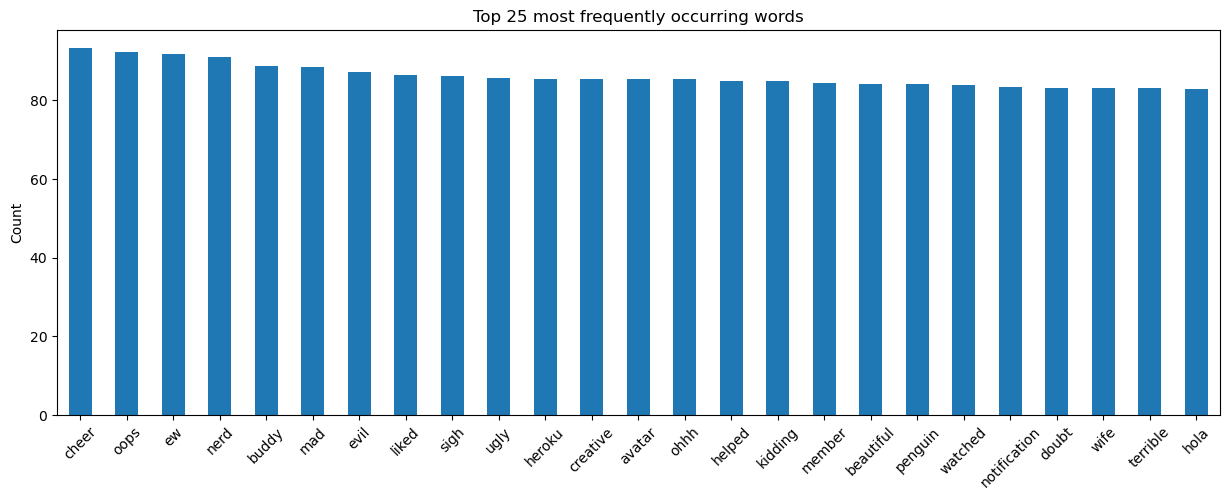

In [33]:
#Third test
word_counts2 = optimize_tfdif(X_train, stop_words='english', max_features=1000, min_df=5, max_df=100)

- Words like "cheer", "oops", "ew", "sigh", "ohhh", "kidding" seem to express emotions, reactions or informal interactions.

- Words like "nerd", "buddy", "evil", "ugly", "creative", "beautiful", "terrible" seem to describe character traits, aesthetic judgments or subjective evaluations.

- Terms such as "heroku", "avatar", "penguin", "watched", "notification" can be linked to online platforms, applications, media or digital interactions.

- Words such as "liked", "helped", "member", "wife", "doubt" may indicate interpersonal relationships, social actions or specific interactions.

# 2. LDA

Latent Dirichlet Allocation (LDA) is a popular topic modeling algorithm used in natural language processing (NLP) to discover hidden topics within a collection of documents. It is an unsupervised learning algorithm that aims to uncover the underlying semantic structure of the text data by assigning topics to each document and word probabilities to each topic.

The LDA algorithm assumes that documents are generated from a mixture of topics, where each topic represents a distribution over words. It then tries to reverse-engineer this process by estimating the topic-word distribution and the document-topic distribution from the observed data.

LDA can be a valuable tool in text analysis, as it allows us to uncover latent themes or topics present in a large corpus of text. It can help in various tasks, such as document clustering, topic summarization, and content recommendation.

In the next step, we will explore how to apply LDA to our text data and extract meaningful topics. We will learn how to preprocess the text, create a document-word matrix, train the LDA model, and interpret the resulting topics. By doing so, we can gain insights into the main themes present in our text data and better understand the underlying patterns and structures within the documents.

In [36]:
#Our lda model function
def model_lda(n_components=10, max_iter=20, learning_method='online'):
    '''
    Function to create and fit an LDA model on the given data.
    
    Parameters:
        - n_components (int): Number of topics to extract. Default is 10.
        - max_iter (int): Number of iterations for topic inference. Default is 20.
        - learning_method (str): Batch learning method. Default is 'online'.
        
    Returns:
        - lda_model: Fitted LDA model object.
    '''
    
    lda_model = LatentDirichletAllocation(n_components=n_components,    # Number of subjects to extract
                                      max_iter=max_iter,        # Number of iterations for topic inference
                                      learning_method=learning_method,  # Batch learning method
                                      random_state=42      # For reproducible results
                                     )
    lda_model.fit(small_transformed)
    
    #Overview on the top 10 subjects in our corpus
    feature_names = vectoriseur.get_feature_names()
    for topic_idx, topic in enumerate(lda_model.components_):
        print("Subject %d:" % (topic_idx+1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))
        print()
    
    return lda_model

In [37]:
# Start the timer
start_time = time.time()

#Our first LDA Model
lda_model = model_lda(n_components=10, max_iter=20, learning_method='online')

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: ", execution_time, " seconds")

Subject 1:
hi hey got everyone problem

Subject 2:
point brownie sends help going

Subject 3:
fcc code guy way learn

Subject 4:
welcome freecodecamp thank oh work

Subject 5:
hello thanks world yeah nice

Subject 6:
yes back go page image

Subject 7:
ok really right mean im

Subject 8:
need say function return first

Subject 9:
lol time use well sure

Subject 10:
good know like look dont

Execution time:  278.98508286476135  seconds


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


When visualizing the topics generated by the LDA model, the following subjects are observed:

- Topics 1, 5, 7, 8 and 10 seem to include words related to social interaction, such as "hi", "hey", "thanks", "hello", "good", "know", "like" and "dont". These may include informal conversations, greetings, thanks and general discussions.

- Topics 2 and 4 contain words such as "point", "brownie", "sends", "help", "work" and "welcome". These topics may be related to requests for help, questions or discussions about the work carried out.

- Topic 3 seems to be linked to the "freecodecamp" context, with words like "fcc", "code" and "learn". These may be discussions specific to this platform, or the sharing of learning experiences.

- Topic 6 contains words like "image", "page" and "go", suggesting discussions or questions about visual elements or navigations to specific pages.

In [38]:
#Enable the librairi for visualization
pyLDAvis.enable_notebook()

In [39]:
#Visualization of the LDA
vis_data = pyLDAvis.sklearn.prepare(lda_model, small_transformed, vectoriseur)
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/py

- **We have 4 quite different groups of themes, with theme 1 being the furthest removed from the other themes.**
- **The themes `5, 8, 9, 10` are very similar: talk more on LEISURE**
- **The themes `1, 2` are very similar: talk more on CODE**
- **The themes `3, 6` are very similar: Talk more on HELP REQUEST**
- **The theme `7` is alone**

This visual also gives us the distribution of the different words in our different themes.

In [40]:
# Start the timer
start_time = time.time()

#Our Second LDA Model
lda_model = model_lda(n_components=20, max_iter=40, learning_method='online')

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: ", execution_time, " seconds")

Subject 1:
im still people working language

Subject 2:
think help name challenge man

Subject 3:
oh yeah issue wait open

Subject 4:
point brownie sends already gave

Subject 5:
hello world new na lmao

Subject 6:
thanks problem really please someone

Subject 7:
right mean said wow yup

Subject 8:
sure return function great array

Subject 9:
lol check awesome true done

Subject 10:
class even feel text button

Subject 11:
thank know much first okay

Subject 12:
ok like try look learn

Subject 13:
need thing get question say

Subject 14:
hi sorry trying anyone game

Subject 15:
hey fcc everyone work one

Subject 16:
yes use back cool cs

Subject 17:
nice code free go camp

Subject 18:
welcome freecodecamp good guy morning

Subject 19:
see haha well getting gitter

Subject 20:
time could day ty found

Execution time:  1118.4398577213287  seconds


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- Discussions about work and language: This theme concerns discussions about working with a specific programming language and the associated challenges. Participants express that they are still actively involved in language-related work.

- Need for help and challenges: Participants seek help and advice regarding specific challenges or problems they face. They express the need for assistance and guidance.

- Excitement and anticipation: This theme indicates a sense of excitement and anticipation. Participants mention looking forward to something or express enthusiasm with phrases such as "oh yeah" and "wait open".

- Previous exchanges and sharing: Participants refer to previous conversations or exchanges where something has already been shared or provided. This theme reflects continuity or reference to previous interactions.

- Greetings and fun: This theme revolves around greetings, introductions and light-hearted fun. Participants use phrases such as "hello world" and "na lmao" to initiate or contribute to a friendly atmosphere.

- Acknowledging and asking for help: Participants express gratitude for help received or anticipate the resolution of a problem. They politely ask someone for help and express the urgency of the problem.

# 3. Kmeans

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning data into distinct groups or clusters. It is an iterative algorithm that aims to find the optimal centroids of the clusters by minimizing the within-cluster variance.

In K-means, the number of clusters, denoted as K, is specified in advance. The algorithm starts by randomly selecting K points from the dataset as initial centroids. Then, it assigns each data point to the nearest centroid based on their distance, typically using Euclidean distance. After the assignment, the centroids are recalculated as the mean of the data points within each cluster. This process is repeated iteratively until convergence, where the centroids no longer change significantly or a specified number of iterations is reached.

The resulting clusters represent groups of similar data points, where the similarity is measured by their proximity to the centroids. K-means is widely used for various applications, such as customer segmentation, image compression, anomaly detection, and document clustering.

In this notebook, we will explore the use of K-means clustering as a technique to discover meaningful patterns or structure in our dataset. We will apply the K-means algorithm to our preprocessed data and analyze the resulting clusters to gain insights and make data-driven decisions.

## First, we will try to determine the best parameters for our model.

### Cluster number

In [ ]:
# Look over a range of K values
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(small_transformed)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)

In [ ]:
# Visualize our K number of cluster
plt.figure(figsize=(12,6))
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means for Dataset 1')
plt.xticks(k_range)
plt.show();

**It appears that the elbow point might be around 6 or 7 clusters.**

Let's look the distribution of the silhouette score.

In [ ]:
# Look over a range of K values
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(small_transformed)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(small_transformed)
    silhouette = silhouette_score(small_transformed, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

In [ ]:
# plot the silhouette 
plt.figure()
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.title('Scree Plot for K-means for Old Faithful')
plt.xticks(k_range)
plt.show();

In [43]:
#Our lda model function
def model_kmeans(n_clusters=6, algorithm="elkan"):
    """
    Apply K-means clustering to the given data.

    Parameters:
    - n_components (int): Number of clusters to form.
    - max_iter (int): Maximum number of iterations for the algorithm to converge.
    - learning_method (str): The learning method to use. Possible values are "online" or "batch".

    Returns:
    - cluster_labels (array-like): Labels indicating the cluster membership for each data point.
    """
    
    # Initialize
    kmeans = KMeans(n_clusters=n_clusters,algorithm=algorithm)

    # Fit
    kmeans.fit(small_transformed)

    # Predict
    cluster_labels = kmeans.predict(small_transformed)
    
    print(f'The fit score (inertia) is: {kmeans.inertia_}')
    
    return cluster_labels

In [44]:
mk = model_kmeans(n_clusters=6, algorithm="elkan")

The fit score (inertia) is: 169521.41734435243


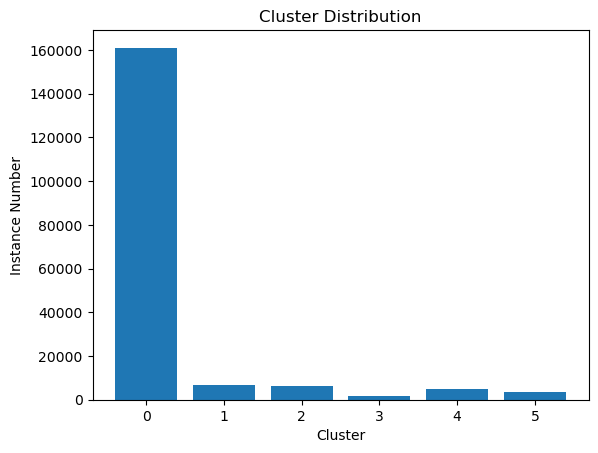

In [47]:
# Count the number of occurrences of each cluster
cluster_counts = np.bincount(mk)

# Create a list of cluster labels
cluster_labels = np.arange(len(cluster_counts))

# Create a bar chart to visualize cluster distribution
plt.bar(cluster_labels, cluster_counts)
plt.xlabel('Cluster')
plt.ylabel('Instance Number')
plt.title('Cluster Distribution')
plt.show()

Our cluster number tend to the rigth.

-----

# Conclusion

In this notebook, we explored the application of TF-IDF, K-means, and LDA techniques on a text dataset. Through the analysis of the generated topics and clusters, we observed several recurring themes in the discussions.

One prominent theme is the discussions about work and language, indicating active involvement in working with specific programming languages and the associated challenges. Participants express their ongoing engagement and interest in language-related work.

Another theme that emerged is the need for help and challenges. Participants seek assistance and guidance, expressing their specific challenges and requesting support from the community.

There is also a theme of excitement and anticipation, with participants expressing their enthusiasm and looking forward to something. Phrases like "oh yeah" and "wait open" indicate a sense of excitement and anticipation in their conversations.

The theme of previous exchanges and sharing reflects continuity and reference to prior interactions. Participants refer to previous conversations or exchanges where information or solutions have already been shared.

Additionally, greetings and light-hearted fun play a role in the discussions. Phrases like "hello world" and "na lmao" create a friendly and welcoming atmosphere, encouraging engagement and interaction among participants.

Finally, participants acknowledge and express gratitude for the help received or anticipated resolution of their problems. They politely ask for assistance and emphasize the urgency of their issues.

Overall, the analysis of topics and clusters revealed these key themes, highlighting the collaborative and supportive nature of the community. The K-means fit score (inertia) indicates the effectiveness of the clustering algorithm in capturing the patterns and structures in the data.

Through the integration of TF-IDF, K-means, and LDA techniques, we gained insights into the content and dynamics of the discussions, facilitating better understanding and exploration of the text dataset.
